In [31]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

In [32]:
def tensor(A, B):
    m = len(A)*len(B)
    n = len(A[0])*len(B[0])

    prod = []

    for i in range(m):
        prod.append([])
        for j in range(n):
            ax = int(i / len(B))
            ay = int(j / len(B[0]))
            bx = int(i % len(B))
            by = int(j % len(B[0]))
            prod[i].append(A[ax][ay]*B[bx][by])

    return np.array(prod)

def tensor_list(ops):
    prod = ops[-1]
    for i in range(len(ops)-2, -1, -1):
        prod = tensor(ops[i], prod)
    return np.array(prod)

def pauli(pos, dir, N):
    factors = [[[1, 0], [0, 1]]]*N
    if dir == 'x':
        factors[pos] = [[0, 1], [1, 0]]
    elif dir == 'y':
        factors[pos] = [[0, -1j], [1j, 0]]
    elif dir == 'z':
        factors[pos] = [[1, 0], [0, -1]]

    return tensor_list(factors)

In [33]:
N = 5
x = np.array(sum([pauli(i, 'x', N) for i in range(N)]))
xy = sum([pauli(i, 'x', N) @ pauli(i+1, 'x', N) + pauli(i, 'y', N) @ pauli(i+1, 'y', N) for i in range(N-1)])
zz = sum([pauli(i, 'z', N) @ pauli(i+1, 'z', N) for i in range(N-1)])

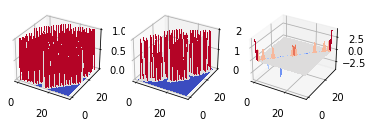

In [34]:
# plotting code from https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py
fig, axes = plt.subplots(ncols=3, subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(2**N)
Y = np.arange(2**N)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf1 = axes[0].plot_surface(X, Y, x, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, label='Pauli X')
surf2 = axes[1].plot_surface(X, Y, xy, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, label='Pauli XX + YY')
surf3 = axes[2].plot_surface(X, Y, zz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, label='Pauli ZZ')


plt.show()

In [44]:
rabi_f = 1
Jxy = 0.3
Jz = 0.1

H = rabi_f * x + Jxy * xy + Jz * zz
eigvalues, eigenvectors = np.linalg.eig(H)

indices = [0,0,0]
for i in range(len(eigvalues)):
    if sorted(eigvalues.real)[0] == eigvalues[i]:
        indices[0] = i
    if sorted(eigvalues.real)[1] == eigvalues[i]:
        indices[1] = i
    if sorted(eigvalues.real)[2] == eigvalues[i]:
        indices[2] = i

print("Eigenvalues")
print(sorted(eigvalues.real)[:3])
print("Eigenvectors (Real)")
for i in range(3):
    print(eigenvectors[indices[i]].real)

print("Eigenvectors (Imaginary)")
for i in range(3):
    print(eigenvectors[indices[i]].imag)

Eigenvalues
[-3.8568594133555965, -3.662968705432463, -3.2140791967394606]
Eigenvectors (Real)
[ 0.16224366  0.06399334  0.1115852   0.20055646  0.12845273  0.08500861
 -0.32085904  0.02409754  0.12705021  0.07189047  0.37971293 -0.11310387
 -0.10835284  0.09476188  0.09622675  0.06328029 -0.11501783  0.1159349
 -0.09635677  0.38786869 -0.04650349  0.10217247 -0.07939025  0.13873189
  0.35784902  0.13448401 -0.28428028 -0.01522595 -0.00975864  0.09176781
 -0.13473047 -0.31460397]
[ 1.74884856e-01  2.77172685e-01 -1.66317203e-01 -1.73575380e-01
  2.49223436e-01 -2.25559021e-01  4.91822979e-17  3.80283890e-02
  1.77048979e-01  1.84386935e-01  6.94600942e-04  3.77260609e-01
  1.35695271e-16  1.95061870e-02  3.78624488e-01 -2.49229447e-01
  2.38484847e-16 -1.63124923e-02  3.70383462e-01 -4.15122300e-02
  8.16763735e-03  3.94730148e-01  1.08583142e-01 -6.21708737e-17
  1.82010767e-16 -6.10622027e-15  2.38359732e-17 -1.04305872e-16
 -3.35834792e-17  2.45184987e-16  2.67589677e-16 -1.81637176